# Homework 2: Modelling<hr>

## 1. Input Data

**<font color="#c62828">NOTE:</font>**
> After receiving comments from the 1st Homework, I re-cleaned my raw data and created a new Clean csv file which is used for this homework. I dropped two features, **age** and **occupation** because:
1. **Age** had 30.7 % of missing data, and the remaining data was not providing enough information that could be relevant to predict **churn**
2. **Occuptaion** had around 73.7 % missing hence had to be removed from the dataframe.
3. **RegionType** had approximately 46.8 % of missing data but the rest of the data was showing a strong relationship with churn, hence decided to keep it for modelling


* The Stacked bar charts are expected to cause the execution of this book to be a bit slow

In [1]:
# The following modules will be needed to prepare our models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Reading our re build ABT
df = pd.read_csv('Customer_Churn_Clean_Re.csv')
df.head(10)

,customer,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1037589,NaN,no,true,7,3,236,true,129.99,E,...,21.33,1.082571,6.208432,13.67,23,2.67,0,0,0,true
1,1076985,town,unknown,false,6,4,190,true,99.99,B,...,0.00,0.540323,-9.142711,37.67,11,8.00,0,0,0,true
2,1076682,NaN,no,false,5,1,330,true,0.00,B,...,4.00,1.089100,4.449768,2.00,11,0.00,0,0,0,true
3,1023911,NaN,yes,false,3,3,192,true,9.99,D,...,18.67,1.221035,7.866714,12.00,21,0.00,0,0,0,false
4,1080089,town,yes,true,2,1,317,true,0.00,C,...,0.33,9.417500,6.814870,3.00,11,0.00,0,0,0,false
5,1070287,suburban,no,false,8,1,364,true,0.00,B,...,0.00,0.000000,-9.774051,0.00,12,0.00,0,0,0,true
6,1034218,NaN,yes,true,6,2,257,true,9.99,B,...,5.33,3.126574,-9.147310,49.00,18,0.00,0,0,0,false
7,1033923,suburban,unknown,false,0,1,723,false,0.00,B,...,1.00,1.422145,-5.879724,1.00,24,0.00,0,0,0,true
8,1050562,NaN,no,false,2,1,495,true,0.00,B,...,0.00,2.027917,2.790690,0.33,17,0.00,0,0,0,true
9,1057360,suburban,yes,false,5,2,208,true,9.99,B,...,0.00,0.884660,-4.004882,0.33,15,0.00,0,0,0,false


<hr>

## 2. Understanding Data

### 2.1 Data Preparation

In [3]:
# Preparing Data that can be used to build a perfect model
df.dtypes

customer                        int64
regionType                     object
marriageStatus                 object
children                       object
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                     object
currentHandsetPrice           float64
creditRating                   object
homeOwner                      object
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCus

In [4]:
# Converting all the 'object' and income and current Handset Price to'category'
obj_feat = df.select_dtypes(['object']).columns
for cols in obj_feat:
    df[cols] = df[cols].str.strip()
    df[cols]=df[cols].astype('category')
df['income'] = df['income'].astype('category')
df['currentHandsetPrice'] = df['currentHandsetPrice'].astype('category')

In [5]:
df.dtypes

customer                         int64
regionType                    category
marriageStatus                category
children                      category
income                        category
numHandsets                      int64
handsetAge                       int64
smartPhone                    category
currentHandsetPrice           category
creditRating                  category
homeOwner                     category
creditCard                        bool
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct      float64
avgDroppedCalls                float64
lifeTime                 

In [6]:
# # Binning handset Age and life Time and number of Handsets so that they can be compared as per their bins with churn
df['handsetAge_bin'] = pd.cut(df['handsetAge'],[0,400,800,1200,1600], labels=['0-400','400-800','800-1200','1200-1600'])
df['lifeTime_bin'] = pd.cut(df['lifeTime'],[0,20,40,60], labels=['0-20','20-40','40-60'])
df['numHandsets_bin'] = pd.cut(df['numHandsets'],[0,5,10], labels=['1-5','5-10'])

In [7]:
# Encoding churn so that it can be treated numerically hence forth
churn_enc = (df['churn']=='true')*1.0
df_churn_enc = pd.DataFrame({'churn_enc':churn_enc})
df_churnenc = pd.concat([df,df_churn_enc],axis=1)
df_churnenc.drop(['churn','handsetAge','lifeTime','numHandsets'],axis=1,inplace=True)

In [8]:
df_churnenc.head(10)

,customer,regionType,marriageStatus,children,income,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,...,peakOffPeakRatioChangePct,avgDroppedCalls,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,handsetAge_bin,lifeTime_bin,numHandsets_bin,churn_enc
0,1037589,NaN,no,true,7,true,129.99,E,false,True,...,6.208432,13.67,2.67,0,0,0,0-400,20-40,1-5,1.0
1,1076985,town,unknown,false,6,true,99.99,B,false,True,...,-9.142711,37.67,8.00,0,0,0,0-400,0-20,1-5,1.0
2,1076682,NaN,no,false,5,true,0.00,B,true,False,...,4.449768,2.00,0.00,0,0,0,0-400,0-20,1-5,1.0
3,1023911,NaN,yes,false,3,true,9.99,D,true,False,...,7.866714,12.00,0.00,0,0,0,0-400,20-40,1-5,0.0
4,1080089,town,yes,true,2,true,0.00,C,false,True,...,6.814870,3.00,0.00,0,0,0,0-400,0-20,1-5,0.0
5,1070287,suburban,no,false,8,true,0.00,B,false,True,...,-9.774051,0.00,0.00,0,0,0,0-400,0-20,1-5,1.0
6,1034218,NaN,yes,true,6,true,9.99,B,false,True,...,-9.147310,49.00,0.00,0,0,0,0-400,0-20,1-5,0.0
7,1033923,suburban,unknown,false,0,false,0.00,B,true,False,...,-5.879724,1.00,0.00,0,0,0,400-800,20-40,1-5,1.0
8,1050562,NaN,no,false,2,true,0.00,B,false,True,...,2.790690,0.33,0.00,0,0,0,400-800,0-20,1-5,1.0
9,1057360,suburban,yes,false,5,true,9.99,B,false,False,...,-4.004882,0.33,0.00,0,0,0,0-400,0-20,1-5,0.0


### <hr>2.2. Split the dataset into <font color="#66BB6A">Train</font>, <font color="#66BB6A">Test</font> using <font color="#42A5F5">Scikit Learn</font>

In [9]:
# Since we are using scikit learn here to perform the train and test split it is better to have a separate series for churn
df_y = df_churnenc['churn_enc']
df_X = df_churnenc.drop(['churn_enc'],axis=1)

In [10]:
# Splitting into test and training set randomly -- random_state = 100  is the seed for split function
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 100)

### <hr> 2.3 Visualising Features <font color = "#4DB6AC"> Training Set </font>

In [11]:
df_churnenc.dtypes

customer                         int64
regionType                    category
marriageStatus                category
children                      category
income                        category
smartPhone                    category
currentHandsetPrice           category
creditRating                  category
homeOwner                     category
creditCard                        bool
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct      float64
avgDroppedCalls                float64
lastMonthCustomerCareCalls     float64
numRetentionCalls                int64
numRetentionOffersAccepte

In [12]:
# Lets split the features into Continuous and Categorical Features now
X_train_category = pd.concat([df_X_train[['regionType','marriageStatus','children','income','smartPhone','currentHandsetPrice','creditRating','homeOwner','creditCard','handsetAge_bin','lifeTime_bin','numHandsets_bin']],df_y_train],axis=1)
X_train_continuous = pd.concat([df_X_train.drop(['regionType','marriageStatus','children','income','smartPhone','currentHandsetPrice','creditRating','homeOwner','creditCard','handsetAge_bin','lifeTime_bin','numHandsets_bin'],axis=1),df_y_train],axis=1)

<hr>

**<font color="#7986CB">CONTINUOUS FEATURES</font>**

In [13]:
# Correlation between the continuous features and churn
X_train_continuous.corr()

,customer,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn_enc
customer,1.000000,0.037088,0.118791,0.066050,0.059562,0.024578,-0.020061,0.038028,0.088832,0.065222,0.027465,-0.102410,0.018510,0.082987,0.129675,-0.020917,-0.023705,-0.014307,-0.072554
avgBill,0.037088,1.000000,0.763937,0.610811,0.850366,0.247273,0.062525,0.103309,0.686817,0.559629,0.458896,-0.028756,0.022042,0.362814,0.210940,0.075295,0.095391,0.010946,0.008160
avgMins,0.118791,0.763937,1.000000,0.560709,0.689507,0.183554,0.017936,0.075208,0.834768,0.718560,0.608824,-0.063842,0.015020,0.499831,0.387181,0.053496,0.074716,0.046534,-0.045910
avgrecurringCharge,0.066050,0.610811,0.560709,1.000000,0.277176,0.152689,0.024286,0.028684,0.459754,0.379836,0.287488,0.014344,-0.007334,0.291142,0.157064,0.018870,0.071140,0.060034,-0.011571
avgOverBundleMins,0.059562,0.850366,0.689507,0.277176,1.000000,0.133016,0.103583,0.141645,0.662512,0.540382,0.429908,-0.027534,0.030754,0.292979,0.140013,0.046803,0.038299,-0.009195,-0.005081
avgRoamCalls,0.024578,0.247273,0.183554,0.152689,0.133016,1.000000,-0.058047,-0.021509,0.092364,0.099503,0.014648,-0.024118,0.044301,0.039834,-0.010322,-0.010915,0.014990,-0.030041,0.033683
callMinutesChangePct,-0.020061,0.062525,0.017936,0.024286,0.103583,-0.058047,1.000000,0.646055,0.003159,-0.068652,-0.005470,0.012669,-0.004039,-0.065520,-0.042260,-0.131143,-0.080955,-0.000505,0.016547
billAmountChangePct,0.038028,0.103309,0.075208,0.028684,0.141645,-0.021509,0.646055,1.000000,0.029807,-0.000426,0.048318,0.023240,-0.005433,-0.049192,-0.077154,-0.025017,0.048636,-0.036094,0.068516
avgReceivedMins,0.088832,0.686817,0.834768,0.459754,0.662512,0.092364,0.003159,0.029807,1.000000,0.635617,0.613204,-0.054407,0.009582,0.421300,0.294045,0.052510,0.063552,0.056320,-0.045695
avgOutCalls,0.065222,0.559629,0.718560,0.379836,0.540382,0.099503,-0.068652,-0.000426,0.635617,1.000000,0.765716,-0.025161,0.030930,0.528803,0.339983,0.084242,0.047711,0.035817,-0.024794


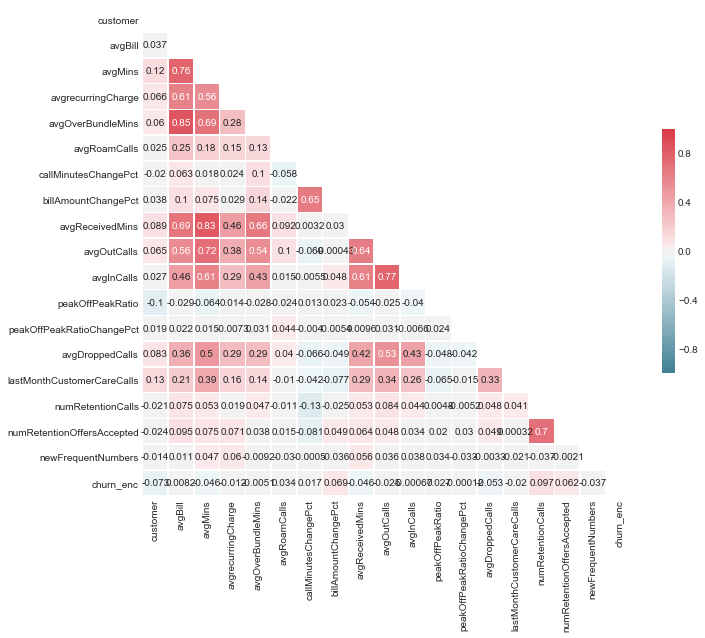

In [14]:
sns.set_style("white")
cont_corr = X_train_continuous.corr()
mask = np.zeros_like(cont_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cont_corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, xticklabels=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5})

> The correlation matrix above, we can see that there are no features that are showing a promising relationship with churn. We will still compare some features with churn in some of the scatterplots below to get some more understanding

Individual Plots:

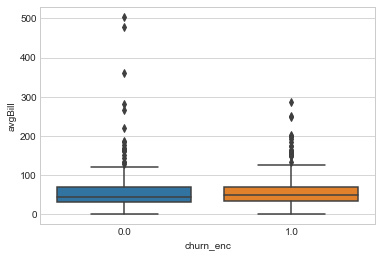

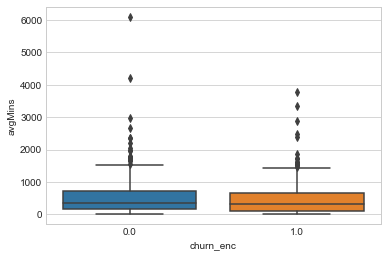

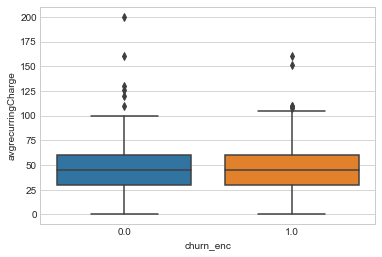

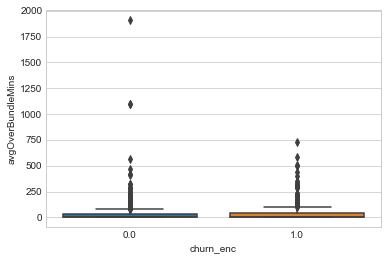

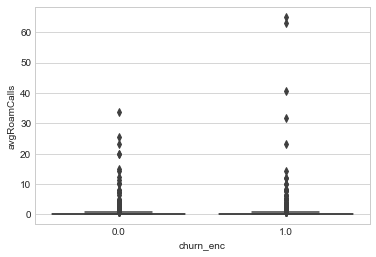

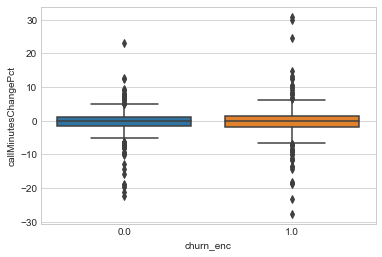

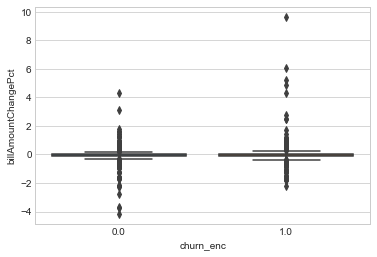

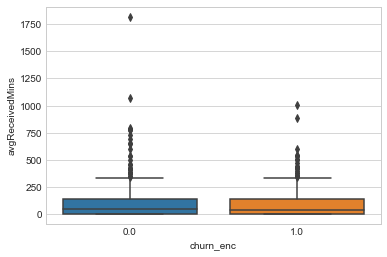

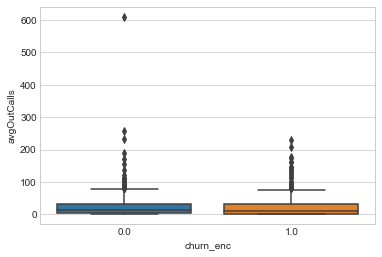

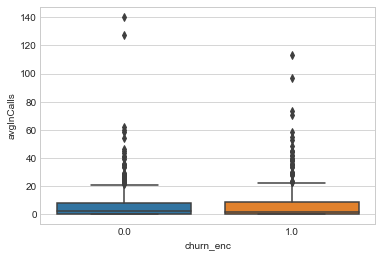

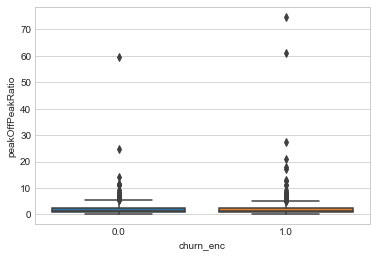

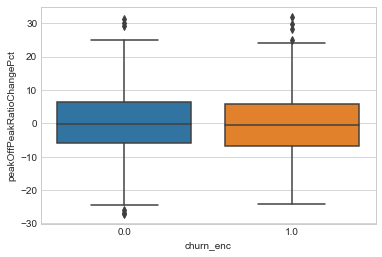

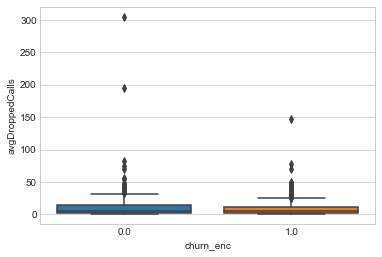

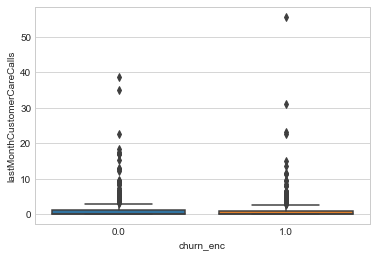

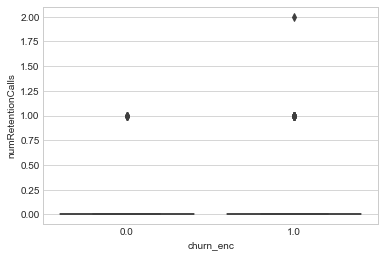

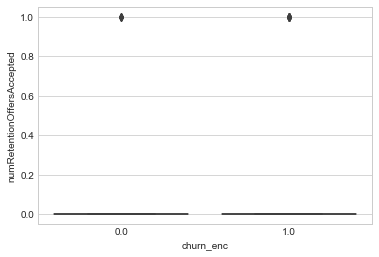

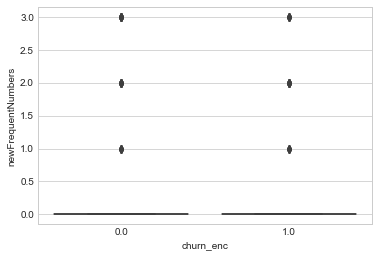

In [15]:
sns.set_style("whitegrid")
plt.figure()
scatter = sns.boxplot(y = 'avgBill',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgMins',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgrecurringCharge',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgOverBundleMins',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgRoamCalls',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'callMinutesChangePct',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'billAmountChangePct',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgReceivedMins',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgOutCalls',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgInCalls',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'peakOffPeakRatio',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'peakOffPeakRatioChangePct',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'avgDroppedCalls',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'lastMonthCustomerCareCalls',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'numRetentionCalls',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'numRetentionOffersAccepted',x='churn_enc',data=X_train_continuous)
plt.figure()
scatter = sns.boxplot(y = 'newFrequentNumbers',x='churn_enc',data=X_train_continuous)


Below are the observations for the above plots
> Even though there isn't much correlation visible between our descriptive features and the target feature, there are some minute differences that can be noted in some features with the help of box plots.
* It seems that people haven't churned less for when their average minutes values is more. Average minutes has a higher IQR for churn value 0. This means less people have churned when they use more minutes or services to call.
* Average Over Bundle Minutes has higher IQR when churn is 1. This means more people have churned who use over the bundled minutes. Also this feature is strongly correlated with average minutes hence can be very useful for predicting churn.
* Call Minutes Change Percentage also has a higher IQR for people who are churning. This shows that people churn when they have a higher changes in their calling behaviour.
* Even though Bill Amount Change Percentage lies around value 0 it is showing a very slight difference and provides us with a small relationship towards churn.
* average received minutes is strongly correlated with average minutes, hence will be selected.
* average incoming call has a highe upper quartile value for people who are churning, but the median of people who do not churn is more for this feature, hence it is quite unclear and so this feature will not be selected.
* Rest other features have not shown any kind of relationship towards churn, hence in order to keep our predictions more accurate we will not select the other features for our modelling

**Continuous Features Selected:**
> * Average Minutes
> * Average Over Bundle Minutes
> * Call Minutes Change Percentage
> * Bill Amount Change Percentage
> * Average Received Minutes

<hr>**<font color="#7986CB">CATEGORICAL FEATURES</font>**

In [16]:
X_train_category.head(10)

,regionType,marriageStatus,children,income,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,handsetAge_bin,lifeTime_bin,numHandsets_bin,churn_enc
420,suburban,yes,false,9,true,0.00,C,false,True,400-800,0-20,1-5,1.0
278,NaN,yes,true,7,true,0.00,B,false,True,0-400,0-20,1-5,0.0
218,town,unknown,false,0,true,0.00,B,true,False,0-400,0-20,1-5,0.0
363,NaN,unknown,false,6,true,129.99,B,false,True,0-400,0-20,1-5,1.0
850,NaN,unknown,false,0,true,129.99,E,true,False,0-400,0-20,1-5,0.0
111,rural,yes,true,4,false,0.00,F,false,True,400-800,0-20,1-5,0.0
479,NaN,yes,false,5,true,199.99,B,false,True,0-400,0-20,1-5,0.0
105,NaN,yes,true,7,true,59.99,A,false,True,400-800,20-40,1-5,1.0
539,NaN,no,false,7,true,149.99,B,false,True,400-800,20-40,1-5,0.0
320,suburban,no,false,4,true,29.99,D,false,True,400-800,20-40,1-5,0.0


C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

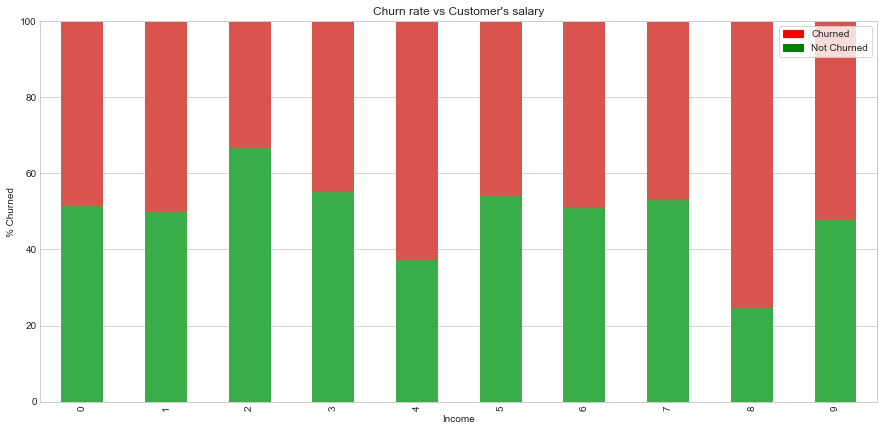

In [17]:
import matplotlib.patches as mpatches
data = X_train_category[['income','churn_enc']]
data['percent']=0
incomes = pd.unique(data.income.ravel())
for i in incomes:
    count = 1 / data[data.income==i].count()['churn_enc']
    index_list = data[data['income']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['income','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer's salary", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("Income")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * % of customers churned is varying across the income values. We cannot see a trend and hence income will not be used

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  """


(0, 100)

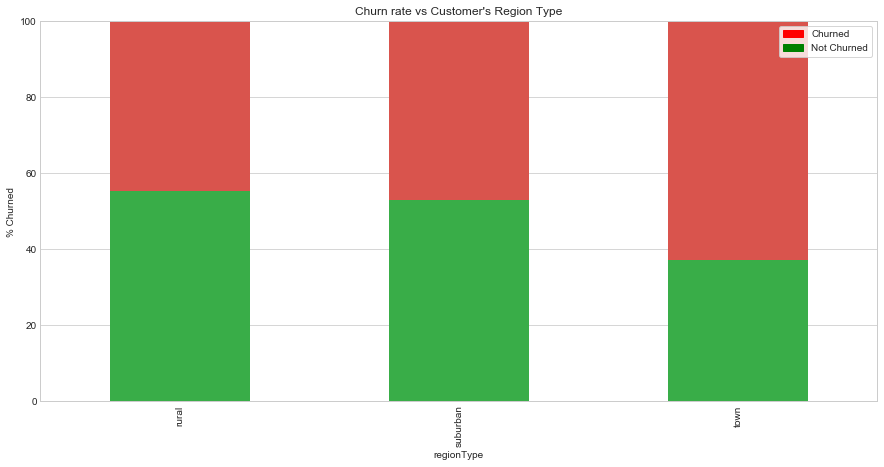

In [18]:
data = X_train_category[['regionType','churn_enc']]
data['percent']=0
incomes = pd.unique(data.regionType.ravel())
for i in incomes:
    count = 1 / data[data.regionType==i].count()['churn_enc']
    index_list = data[data['regionType']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['regionType','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer's Region Type", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("regionType")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

>* We can see that around 62% of people from town have churned more. Where as there is an approximately 50% chance for people to churn either from subarbun or rural areas.

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

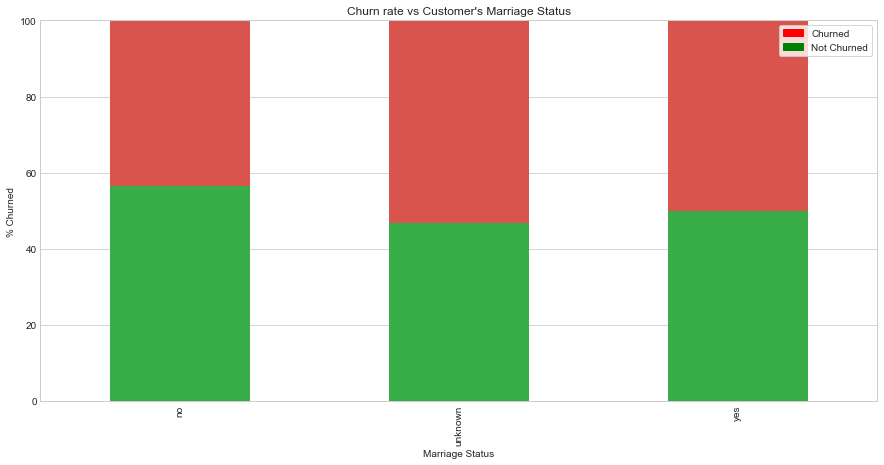

In [19]:
data = X_train_category[['marriageStatus','churn_enc']]
data['percent']=0
incomes = pd.unique(data.marriageStatus.ravel())
for i in incomes:
    count = 1 / data[data.marriageStatus==i].count()['churn_enc']
    index_list = data[data['marriageStatus']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['marriageStatus','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer's Marriage Status", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("Marriage Status")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * Information provided cannot be dependent since a lot of information is dependent on the unknown value as well

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

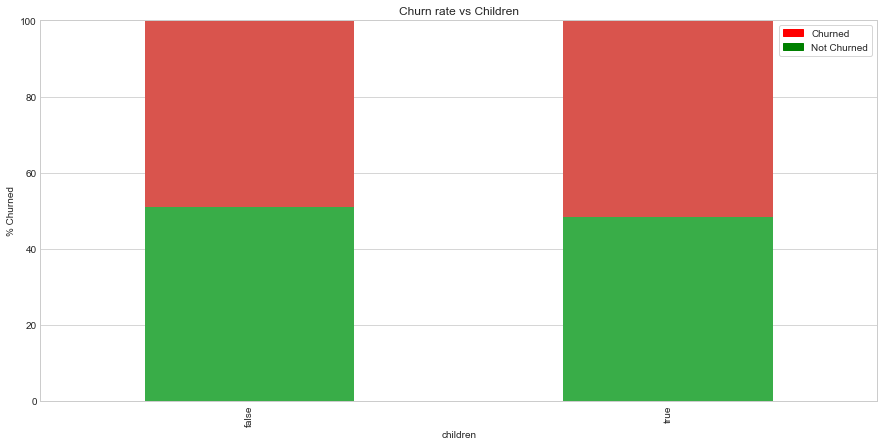

In [20]:
data = X_train_category[['children','churn_enc']]
data['percent']=0
incomes = pd.unique(data.children.ravel())
for i in incomes:
    count = 1 / data[data.children==i].count()['churn_enc']
    index_list = data[data['children']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['children','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Children", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("children")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * As we can see from the above graph churn rate is independent of the fact that whether the customer has children or no

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

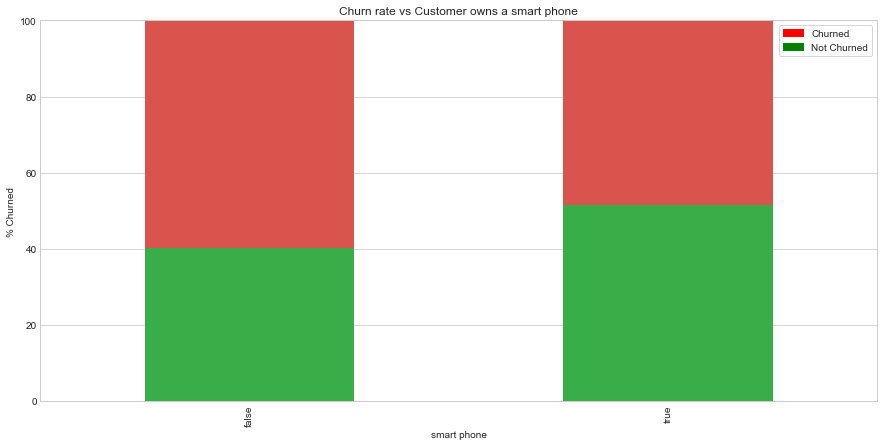

In [21]:
data = X_train_category[['smartPhone','churn_enc']]
data['percent']=0
incomes = pd.unique(data.smartPhone.ravel())
for i in incomes:
    count = 1 / data[data.smartPhone==i].count()['churn_enc']
    index_list = data[data['smartPhone']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['smartPhone','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer owns a smart phone", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("smart phone")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * We can see that customers with smart phone are churning less than those without

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

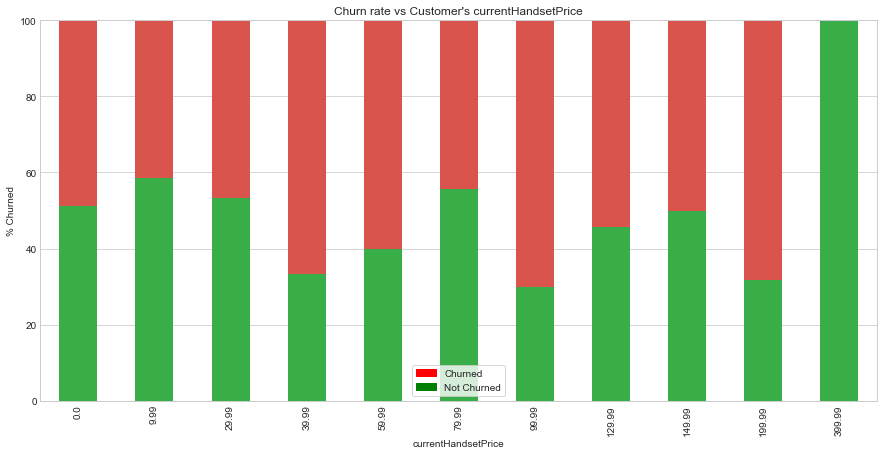

In [22]:
data = X_train_category[['currentHandsetPrice','churn_enc']]
data['percent']=0
incomes = pd.unique(data.currentHandsetPrice.ravel())
for i in incomes:
    count = 1 / data[data.currentHandsetPrice==i].count()['churn_enc']
    index_list = data[data['currentHandsetPrice']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['currentHandsetPrice','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer's currentHandsetPrice", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("currentHandsetPrice")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * Current handset price also is not providing any important trend that can be used to predict churn. Value 399.99 is just one customer who has not churned

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

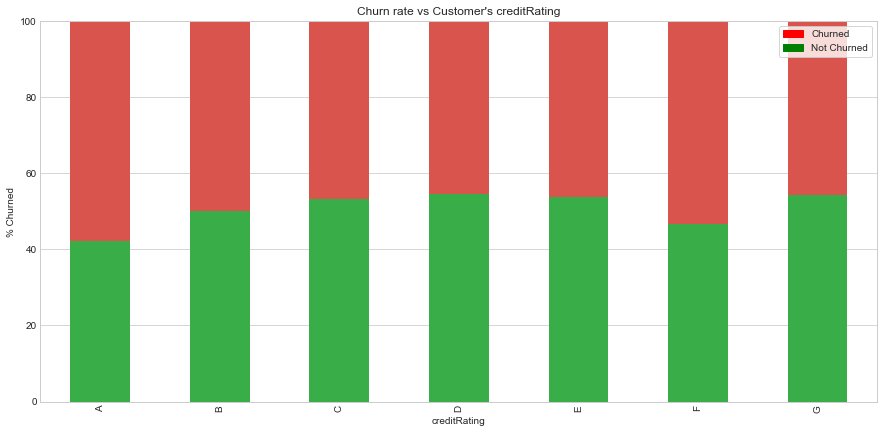

In [23]:
data = X_train_category[['creditRating','churn_enc']]
data['percent']=0
incomes = pd.unique(data.creditRating.ravel())
for i in incomes:
    count = 1 / data[data.creditRating==i].count()['churn_enc']
    index_list = data[data['creditRating']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['creditRating','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer's creditRating", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("creditRating")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * Credit Rating is also not providing any useful information or any useful trend hence will not be selected

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

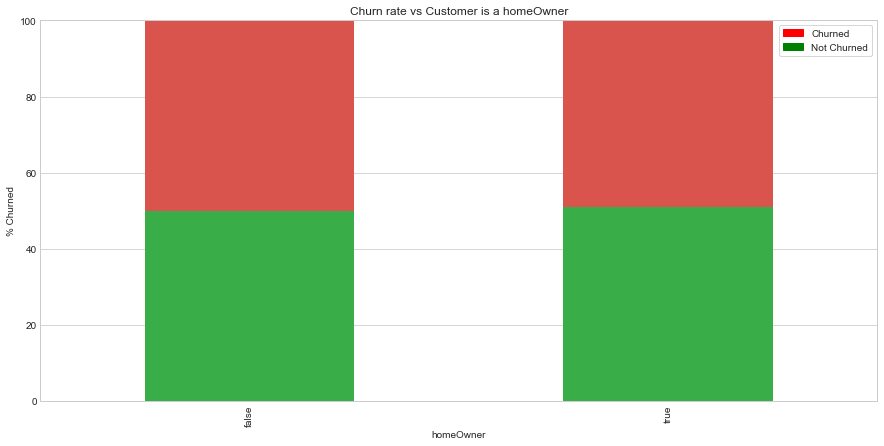

In [24]:
data = X_train_category[['homeOwner','churn_enc']]
data['percent']=0
incomes = pd.unique(data.homeOwner.ravel())
for i in incomes:
    count = 1 / data[data.homeOwner==i].count()['churn_enc']
    index_list = data[data['homeOwner']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['homeOwner','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer is a homeOwner", figsize=(15,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("homeOwner")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * Information whether a customer owns a home or not is also not a important feature in predicting churn, as seen in the above chart. There is no trend

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  """


(0, 100)

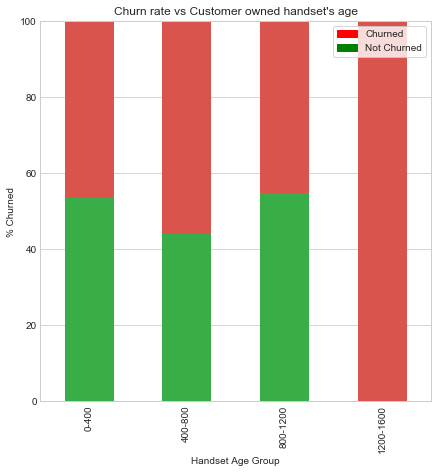

In [25]:
data = X_train_category[['handsetAge_bin','churn_enc']]
data['percent']=0
incomes = pd.unique(data.handsetAge_bin.ravel())
for i in incomes:
    count = 1 / data[data.handsetAge_bin==i].count()['churn_enc']
    index_list = data[data['handsetAge_bin']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['handsetAge_bin','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer owned handset's age", figsize=(7,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("Handset Age Group")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * We can see that all the customers whose handset's age is above 1200 have churned. We will use this feature for our prediction

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

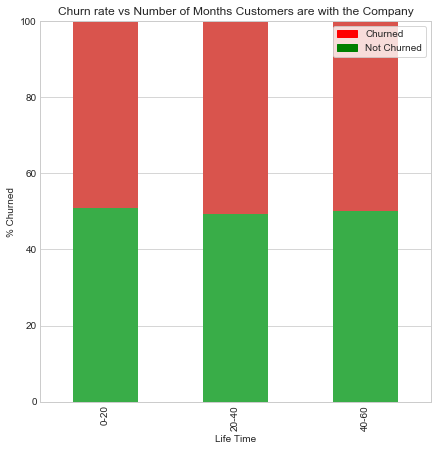

In [26]:
data = X_train_category[['lifeTime_bin','churn_enc']]
data['percent']=0
incomes = pd.unique(data.lifeTime_bin.ravel())
for i in incomes:
    count = 1 / data[data.lifeTime_bin==i].count()['churn_enc']
    index_list = data[data['lifeTime_bin']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['lifeTime_bin','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Number of Months Customers are with the Company", figsize=(7,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("Life Time")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * There is not much information provided by the feature lifetime.

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  """


(0, 100)

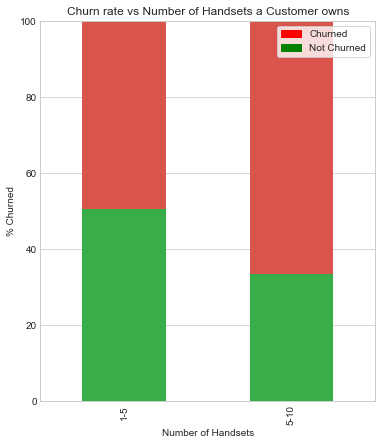

In [27]:
data = X_train_category[['numHandsets_bin','churn_enc']]
data['percent']=0
incomes = pd.unique(data.numHandsets_bin.ravel())
for i in incomes:
    count = 1 / data[data.numHandsets_bin==i].count()['churn_enc']
    index_list = data[data['numHandsets_bin']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['numHandsets_bin','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Number of Handsets a Customer owns", figsize=(6,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("Number of Handsets")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * We can see that people having more handsets tend to churn more. Aprroximately 35% people have not churned who has more than 5 handsets

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 100)

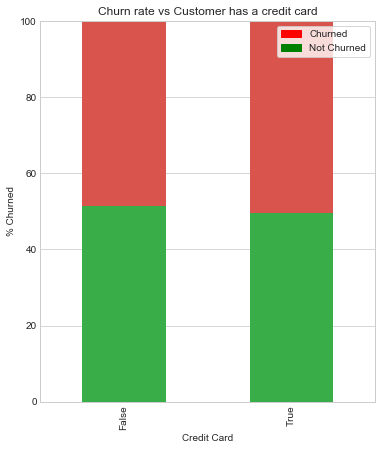

In [28]:
data = X_train_category[['creditCard','churn_enc']]
data['percent']=0
incomes = pd.unique(data.creditCard.ravel())
for i in incomes:
    count = 1 / data[data.creditCard==i].count()['churn_enc']
    index_list = data[data['creditCard']==i].index.tolist()
    for i in index_list:
        data.loc[i,'percent'] = count*100

group = data.groupby(['creditCard','churn_enc']).sum()
sns.set_style('whitegrid')
my_plot = group.unstack().plot(kind='bar',stacked=True,title="Churn rate vs Customer has a credit card", figsize=(6,7),color=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["pale red"]])
red_patch = mpatches.Patch(color="red", label='Churned')
green_patch = mpatches.Patch(color="green", label='Not Churned')
my_plot.legend(handles=[red_patch, green_patch], frameon = True)
my_plot.set_xlabel("Credit Card")
my_plot.set_ylabel("% Churned")
my_plot.set_ylim([0,100])

> * Credit Card has also not provided any important information hence will not be used

**Categorical Features Selected**
> * region type
> * smart phone
> * number of handsets
> * handset age

## <hr> 3. Modelling and Prediction

This section of the codebook provides the two types of predictive models that can be used to perform the prediction of churn from the above seleted descriptive features. <br>
The models that will be used are:<br>
1. **Linear Regression**
2. **Logistic Regression**

The followig are the datasets for our training and testing pupose:

**Training Dataset**
1. df_X_train
2. df_y_train

**Testing Dataset**
1. df_X_test
2. df_y_test

In [29]:
# Importing statsmodels to work our linear regression on the training set
import statsmodels.api as sm

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
# Creating a new training and test sets with only the required columns in them
df_X_train_new = df_X_train[['avgMins','avgOverBundleMins','callMinutesChangePct','billAmountChangePct','avgReceivedMins','regionType','smartPhone','numHandsets_bin','handsetAge_bin']]
df_X_test_new = df_X_test[['avgMins','avgOverBundleMins','callMinutesChangePct','billAmountChangePct','avgReceivedMins','regionType','smartPhone','numHandsets_bin','handsetAge_bin']]

In [31]:
# Performing binary encoding on all the categorical features
# The below steps will provide us with a new dataset holding all the features in numerical type

# Step 1: Create a new dataframe with only continuous features
df_X_train_cont = df_X_train_new[['avgMins','avgOverBundleMins','callMinutesChangePct','billAmountChangePct','avgReceivedMins']]
# df_X_train_cont = df_X_train_new[['avgMins']]

# Step 2: Create dummies for each of the ctegorical features
handsetAge_dummies = pd.get_dummies(df_X_train_new.handsetAge_bin, prefix='handsetAgeGroup')
regionType_dummies = pd.get_dummies(df_X_train_new.regionType, prefix='regionType')
numHandsets_dummies = pd.get_dummies(df_X_train_new.numHandsets_bin, prefix='numHandsetsGroup')
smartPhone_dummies = pd.get_dummies(df_X_train_new.smartPhone, prefix='smartPhone')

# Step 3: Concatenate all the dummies series with the continuous features dataframe
X_train_final = pd.concat([df_X_train_cont,handsetAge_dummies,regionType_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)
# X_train_final = pd.concat([age_dummies,handsetAge_dummies,lifeTime_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)
X_train_final

,avgMins,avgOverBundleMins,callMinutesChangePct,billAmountChangePct,avgReceivedMins,handsetAgeGroup_0-400,handsetAgeGroup_400-800,handsetAgeGroup_800-1200,handsetAgeGroup_1200-1600,regionType_rural,regionType_suburban,regionType_town,numHandsetsGroup_1-5,numHandsetsGroup_5-10,smartPhone_false,smartPhone_true
420,246.75,18.75,-1.815,-0.1312,45.12,0,1,0,0,0,1,0,1,0,0,1
278,170.25,0.00,-0.205,-0.0248,19.16,1,0,0,0,0,0,0,1,0,0,1
218,336.25,16.00,-1.485,-0.1558,63.61,1,0,0,0,0,0,1,1,0,0,1
363,723.25,46.25,-0.585,-0.2884,189.07,1,0,0,0,0,0,0,1,0,0,1
850,939.50,26.25,9.370,0.6940,116.63,1,0,0,0,0,0,0,1,0,0,1
111,422.00,0.00,-3.540,-0.0100,108.70,0,1,0,0,1,0,0,1,0,1,0
479,814.25,0.00,1.815,0.2574,194.60,1,0,0,0,0,0,0,1,0,0,1
105,532.00,31.25,-0.640,-0.1612,63.49,0,1,0,0,0,0,0,1,0,0,1
539,212.75,10.75,0.645,-0.0538,87.67,0,1,0,0,0,0,0,1,0,0,1
320,1051.00,68.50,7.820,0.1988,424.57,0,1,0,0,0,1,0,1,0,0,1


In [32]:
# Now we will perform Standardisation a type of range normalisation for all the features 
# so that they all fall on the same scale which will provide a much accurate learning for the model

X_train_st = (X_train_final - X_train_final.mean()) / X_train_final.std()
X_train_st

,avgMins,avgOverBundleMins,callMinutesChangePct,billAmountChangePct,avgReceivedMins,handsetAgeGroup_0-400,handsetAgeGroup_400-800,handsetAgeGroup_800-1200,handsetAgeGroup_1200-1600,regionType_rural,regionType_suburban,regionType_town,numHandsetsGroup_1-5,numHandsetsGroup_5-10,smartPhone_false,smartPhone_true
420,-0.461245,-0.206832,-0.287721,-0.166283,-0.380035,-1.276420,1.495841,-0.252465,-0.100432,-0.207743,1.461492,-0.456818,0.147873,-0.131973,-0.35131,0.35131
278,-0.597922,-0.358943,0.044574,-0.034017,-0.542794,0.782322,-0.667565,-0.252465,-0.100432,-0.207743,-0.683255,-0.456818,0.147873,-0.131973,-0.35131,0.35131
218,-0.301343,-0.229142,-0.219611,-0.196863,-0.264110,0.782322,-0.667565,-0.252465,-0.100432,-0.207743,-0.683255,2.185930,0.147873,-0.131973,-0.35131,0.35131
363,0.390079,0.016265,-0.033856,-0.361697,0.522475,0.782322,-0.667565,-0.252465,-0.100432,-0.207743,-0.683255,-0.456818,0.147873,-0.131973,-0.35131,0.35131
850,0.776435,-0.145987,2.020799,0.859518,0.068305,0.782322,-0.667565,-0.252465,-0.100432,-0.207743,-0.683255,-0.456818,0.147873,-0.131973,-0.35131,0.35131
111,-0.148140,-0.358943,-0.643751,-0.015620,0.018587,-1.276420,1.495841,-0.252465,-0.100432,4.806753,-0.683255,-0.456818,0.147873,-0.131973,2.84242,-2.84242
479,0.552661,-0.358943,0.461490,0.316784,0.557146,0.782322,-0.667565,-0.252465,-0.100432,-0.207743,-0.683255,-0.456818,0.147873,-0.131973,-0.35131,0.35131
105,0.048388,-0.105424,-0.045208,-0.203575,-0.264862,-1.276420,1.495841,-0.252465,-0.100432,-0.207743,-0.683255,-0.456818,0.147873,-0.131973,-0.35131,0.35131
539,-0.521990,-0.271733,0.220009,-0.070067,-0.113263,-1.276420,1.495841,-0.252465,-0.100432,-0.207743,-0.683255,-0.456818,0.147873,-0.131973,-0.35131,0.35131
320,0.975643,0.196770,1.700888,0.243938,1.998968,-1.276420,1.495841,-0.252465,-0.100432,-0.207743,1.461492,-0.456818,0.147873,-0.131973,-0.35131,0.35131


### 3.1 Linear Regression

**Training and Evaluation <font color="#4DB6AC">Training Set</font>**

In [33]:
# Now we will make our model to learn from these descriptive features

X = sm.add_constant(X_train_st)
model = sm.OLS(df_y_train,X).fit()
print(model.params)

const                        0.497143
avgMins                     -0.027215
avgOverBundleMins            0.022285
callMinutesChangePct        -0.033594
billAmountChangePct          0.058990
avgReceivedMins             -0.004522
handsetAgeGroup_0-400        0.243620
handsetAgeGroup_400-800      0.273105
handsetAgeGroup_800-1200     0.109840
handsetAgeGroup_1200-1600    0.099212
regionType_rural            -0.004010
regionType_suburban         -0.000297
regionType_town              0.061027
numHandsetsGroup_1-5         0.016399
numHandsetsGroup_5-10        0.043140
smartPhone_false             0.008467
smartPhone_true             -0.008467
dtype: float64


**Interpretation of Model**
>Since the model is a linear regression model, it will follow the following formula
$target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n$

>If we substitute the above obtained values in the formula we will get <br>
churn = 0.497143 - 0.027215 \* avgMins + 0.022285 \* avgOverBundleMins - 0.033594 \* callMinutesChangePct + 0.058990 \* billAmountChangePct - 0.004522 \* avgReceivedMins + .... [and so on]

>The above results provides us with the intercept ('const') value of 0.497143. Intercept holding this value means that if all the other descriptive features are not present then the churn value will be the value of the intercept.<br>
>Rest all other values provides individual weights for the features, where a positive value means that one unit increase of the individual feature will cause the target feature to increase by its weight's value. On the other hand the negative values means that one unit increase of the individual feature will cause the target feature to decrease byt its weight's value.

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              churn_enc   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.321
Date:                Sun, 08 Apr 2018   Prob (F-statistic):            0.00311
Time:                        08:44:21   Log-Likelihood:                -490.67
No. Observations:                 700   AIC:                             1013.
Df Residuals:                     684   BIC:                             1086.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

> * Looking at the summary we can threshold the p-value to 0.06 which means we can look for features that provides a strong evidence (~94%) to negate the null hypothesis or provide relationship with the target feature
> * We can see that not all the features have their p-value below 0.06. Only billAmountChangePct, handsetAgeGroup_1200-1600 and regionType_town have p-values less than 0.6. hence we can say that this model isn't the best model for performing the prediction. We can use a strategy called **feature selection** which can be explored in later section of this book.
> * R2 value is below 0.1 which is more realistic because the linear model provides us with an extremely rough approximation to the data. There also can be a lot of residual errors due to some unmeasured factors
> * Also the 95% confidence interval tells us what is the probable values for the weights most of the times

In [35]:
# Evaluating the model on the training data.
X_train_predict = model.predict(X.head(100))

index_list = X_train_predict.index.tolist()

# Setting the threshold to 0.5
for i in index_list:
    if X_train_predict.loc[i] < 0.5:
        X_train_predict.loc[i] = 0
    else:
        X_train_predict.loc[i] = 1

X_train_mod_out = pd.DataFrame({'Actual_Churn':df_y_train.head(100),'Predicted_Churn':X_train_predict})
X_train_mod_out

,Actual_Churn,Predicted_Churn
420,1.0,1.0
278,0.0,0.0
218,0.0,1.0
363,1.0,0.0
850,0.0,0.0
111,0.0,1.0
479,0.0,0.0
105,1.0,1.0
539,0.0,1.0
320,0.0,0.0


**Classification Evaluation Measures**

In [36]:
y = X_train_mod_out.Actual_Churn
predictions = X_train_mod_out.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.6
Confusion matrix: 
 [[37 15]
 [25 23]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.60      0.71      0.65        52
        1.0       0.61      0.48      0.53        48

avg / total       0.60      0.60      0.59       100



<center>**Interpreting Classification Evaluation Measures**</center>

* <center>**Confusion Matrix**</center>

| n = 100   | Predicted: 0 | Predicted: 1 | Total |
|-----------|--------------|--------------|-------|
| Actual: 0 | 37           | 15           | 52    |
| Actual: 1 | 25           | 23           | 48    |
| Total     | 62           | 38           | 100   |

* This model is providing an accuracy of 60 % on our training set
* We can observe that when actual churn is '0' our model has correctly predicted these zeroes 37 times. whereas the rest 15 times it predicted it to be '1'. Hence the **recall** to predict '0's of the model is 71 %.<br>
* Also, our model could only predict true '1's only 23 times out of a total 48 times, by giving us a **recall** rate of 48%.<br> This means that since there are more zeroes as compared to ones in our dataset, model is predicting more '0's than '1's.<br> 
* The **precision** is given by the ratio of predicted value and the total predictions (both true and false) of that value. Hence for '0's we have a **precision** of 60% whereas for '1's it is 61%. 
* As we can see recall for 0s is more whereas precision for '1's is more. Hence it is better to use a value which can interpret both these quantities in one. Hence we take their harmonic mean in **f1 score** which gives us a score of 65 % for '0's and 53 % for '1's, and ging us a average **f1 score** of 59% for the entire model

<hr>**Testing and Evaluation <font color="#4DB6AC">Test Set</font>**

In [37]:
# Performing binary encoding on all the categorical features
# The below steps will provide us with a new dataset holding all the features in numerical type

# Step 1: Create a new dataframe with only continuous features
df_X_test_cont = df_X_test_new[['avgMins','avgOverBundleMins','callMinutesChangePct','billAmountChangePct','avgReceivedMins']]
# df_X_train_cont = df_X_train_new[['avgMins']]

# Step 2: Create dummies for each of the ctegorical features
handsetAge_dummies = pd.get_dummies(df_X_test_new.handsetAge_bin, prefix='handsetAgeGroup')
regionType_dummies = pd.get_dummies(df_X_test_new.regionType, prefix='regionType')
numHandsets_dummies = pd.get_dummies(df_X_test_new.numHandsets_bin, prefix='numHandsetsGroup')
smartPhone_dummies = pd.get_dummies(df_X_test_new.smartPhone, prefix='smartPhone')

# Step 3: Concatenate all the dummies series with the continuous features dataframe
X_test_final = pd.concat([df_X_test_cont,handsetAge_dummies,regionType_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)
# X_train_final = pd.concat([age_dummies,handsetAge_dummies,lifeTime_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)
X_test_final

,avgMins,avgOverBundleMins,callMinutesChangePct,billAmountChangePct,avgReceivedMins,handsetAgeGroup_0-400,handsetAgeGroup_400-800,handsetAgeGroup_800-1200,handsetAgeGroup_1200-1600,regionType_rural,regionType_suburban,regionType_town,numHandsetsGroup_1-5,numHandsetsGroup_5-10,smartPhone_false,smartPhone_true
249,130.00,18.75,0.1200,0.2812,13.05,0,1,0,0,0,0,0,1,0,0,1
353,90.50,0.00,0.1100,0.0000,13.66,0,1,0,0,0,0,0,1,0,0,1
537,143.25,9.75,-1.2050,-0.0772,21.90,0,1,0,0,0,1,0,1,0,0,1
424,420.25,81.00,-0.3650,-0.0980,137.97,0,1,0,0,0,1,0,1,0,1,0
564,1567.50,0.00,-0.2900,-0.0118,438.85,1,0,0,0,0,0,0,1,0,1,0
124,75.25,0.00,0.2550,0.0000,12.33,0,1,0,0,0,1,0,1,0,0,1
492,333.00,51.75,-1.9400,-0.3622,60.94,0,1,0,0,0,0,1,1,0,0,1
553,352.75,0.50,3.1050,0.0172,72.91,1,0,0,0,0,1,0,1,0,0,1
982,58.50,16.25,-0.6100,-0.1254,2.37,0,0,1,0,0,1,0,1,0,0,1
935,220.75,3.50,3.3450,0.2636,34.43,0,1,0,0,1,0,0,1,0,0,1


In [38]:
# Now we will perform Standardisation a type of range normalisation for all the features 
# so that they all fall on the same scale which will provide a much accurate learning for the model

X_test_st = (X_test_final - X_test_final.mean()) / X_test_final.std()

In [39]:
X_test_st

,avgMins,avgOverBundleMins,callMinutesChangePct,billAmountChangePct,avgReceivedMins,handsetAgeGroup_0-400,handsetAgeGroup_400-800,handsetAgeGroup_800-1200,handsetAgeGroup_1200-1600,regionType_rural,regionType_suburban,regionType_town,numHandsetsGroup_1-5,numHandsetsGroup_5-10,smartPhone_false,smartPhone_true
249,-0.721454,-0.258613,0.101121,0.462923,-0.557152,-1.096295,1.360497,-0.320309,-0.100336,-0.220880,-0.684850,-0.441099,0.116054,-0.116054,-0.374454,0.374454
353,-0.803127,-0.536173,0.098900,0.007516,-0.553262,-1.096295,1.360497,-0.320309,-0.100336,-0.220880,-0.684850,-0.441099,0.116054,-0.116054,-0.374454,0.374454
537,-0.694057,-0.391842,-0.193220,-0.117511,-0.500715,-1.096295,1.360497,-0.320309,-0.100336,-0.220880,1.455306,-0.441099,0.116054,-0.116054,-0.374454,0.374454
424,-0.121307,0.662889,-0.006619,-0.151197,0.239460,-1.096295,1.360497,-0.320309,-0.100336,-0.220880,1.455306,-0.441099,0.116054,-0.116054,2.661656,-2.661656
564,2.250848,-0.536173,0.010042,-0.011595,2.158162,0.909123,-0.732575,-0.320309,-0.100336,-0.220880,-0.684850,-0.441099,0.116054,-0.116054,2.661656,-2.661656
124,-0.834659,-0.536173,0.131111,0.007516,-0.561743,-1.096295,1.360497,-0.320309,-0.100336,-0.220880,1.455306,-0.441099,0.116054,-0.116054,-0.374454,0.374454
492,-0.301713,0.229894,-0.356496,-0.579072,-0.251759,-1.096295,1.360497,-0.320309,-0.100336,-0.220880,-0.684850,2.259508,0.116054,-0.116054,-0.374454,0.374454
553,-0.260876,-0.528772,0.764221,0.035371,-0.175426,0.909123,-0.732575,-0.320309,-0.100336,-0.220880,1.455306,-0.441099,0.116054,-0.116054,-0.374454,0.374454
982,-0.869293,-0.295621,-0.061044,-0.195571,-0.625258,-1.096295,-0.732575,3.111576,-0.100336,-0.220880,1.455306,-0.441099,0.116054,-0.116054,-0.374454,0.374454
935,-0.533811,-0.484362,0.817536,0.434420,-0.420812,-1.096295,1.360497,-0.320309,-0.100336,4.512258,-0.684850,-0.441099,0.116054,-0.116054,-0.374454,0.374454


In [40]:
X = sm.add_constant(X_test_st)

In [41]:
# Evaluating the model on the test data.
X_test_predict = model.predict(X)

index_list = X_test_predict.index.tolist()

# Setting the threshold to 0.5
for i in index_list:
    if X_test_predict.loc[i] < 0.5:
        X_test_predict.loc[i] = 0
    else:
        X_test_predict.loc[i] = 1

X_test_mod_out = pd.DataFrame({'Actual_Churn':df_y_test,'Predicted_Churn':X_test_predict})
X_test_mod_out

,Actual_Churn,Predicted_Churn
249,0.0,1.0
353,0.0,1.0
537,0.0,1.0
424,1.0,1.0
564,0.0,0.0
124,0.0,1.0
492,0.0,1.0
553,1.0,0.0
982,0.0,0.0
935,1.0,1.0


**Classification Evaluation Measures**

In [42]:
y = X_test_mod_out.Actual_Churn
predictions = X_test_mod_out.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.4666666666666667
Confusion matrix: 
 [[77 73]
 [87 63]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.47      0.51      0.49       150
        1.0       0.46      0.42      0.44       150

avg / total       0.47      0.47      0.47       300



<center>**Interpreting Classification Evaluation Measures**</center>

* <center>**Confusion Matrix**</center>

| n = 100   | Predicted: 0 | Predicted: 1 | Total |
|-----------|--------------|--------------|-------|
| Actual: 0 | 77           | 73           | 150   |
| Actual: 1 | 87           | 63           | 150   |
| Total     | 164          | 136          | 300   |

* The accuracy for correctly predicting values is around 46%
* We can observe that when actual churn is '0' our model has correctly predicted these zeroes 77 times. whereas the rest 73 times it predicted it to be '1'. Hence the **recall** to predict '0's of the model is 51 %.<br>
* Also, our model could only predict true '1's only 63 times out of a total 150 times, by giving us a **recall** rate of 42%.<br> This means that since there are more zeroes as compared to ones in our dataset while training, our model is predicting more '0's than '1's.<br> 
* The **precision** is given by the ratio of predicted value and the total predictions (both 0 and 1) of that value. Hence for '0's we have a **precision** of 47% whereas for '1's it is 46%. 
* It is better to use a value which can interpret both these quantities in one. Hence we take their harmonic mean in **f1 score** which gives us a score of 49 % for '0's and 44 % for '1's, and ging us a average **f1 score** of 47% for the entire model

<hr>**Evaluating the model <font color="#4DB6AC">Cross Validation</font>**

In [43]:
# Cross validaton can be easily performed using scikit learn
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import ShuffleSplit

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
# Adding the intercept to the feature columns
X = df_X[['avgMins','avgOverBundleMins','callMinutesChangePct','billAmountChangePct','avgReceivedMins','handsetAge_bin','regionType','numHandsets_bin','smartPhone']]
y = df_y

In [45]:
# Converting all the categorical features to dummies
handsetAge_dummies = pd.get_dummies(X.handsetAge_bin, prefix='handsetAgeGroup')
regionType_dummies = pd.get_dummies(X.regionType, prefix='regionType')
numHandsets_dummies = pd.get_dummies(X.numHandsets_bin, prefix='numHandsetsGroup')
smartPhone_dummies = pd.get_dummies(X.smartPhone, prefix='smartPhone')

X_new = pd.concat([X,handsetAge_dummies,regionType_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)

X_new.drop(['regionType','handsetAge_bin','numHandsets_bin','smartPhone'],axis=1,inplace=True)

In [46]:
loo = cross_validation.LeaveOneOut(len(y))

regr = linear_model.LinearRegression()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_validation.cross_val_score(regr, X_new, y, scoring='neg_mean_squared_error', cv=10,)

In [47]:
# This gives us the mean squared errors in each fold of cross validation
print(scores)

[-0.2483954  -0.25541393 -0.24369225 -0.25500313 -0.23763264 -0.27185081
 -0.24537997 -0.26195164 -0.25279371 -0.24692602]


In [48]:
scores = cross_validation.cross_val_score(regr, X_new, y, scoring='r2', cv=10,)

In [49]:
# This gives us the r2 in each fold of cross validation
print(scores)

[-0.00809821 -0.02329301  0.02366887 -0.02369782  0.04794614 -0.13271173
  0.01493387 -0.05159228 -0.01157945  0.01071306]


<hr> Accuracy score the entire dataset

In [50]:
# Normalising all values
X_norm = (X_new - X_new.mean()) / X_new.std()

In [51]:
# Predicting y on the entire data set 
X = sm.add_constant(X_norm)
# Evaluating the model on the test data.
y_pred = model.predict(X)

index_list = y_pred.index.tolist()

# Setting the threshold to 0.5
for i in index_list:
    if y_pred.loc[i] < 0.5:
        y_pred.loc[i] = 0
    else:
        y_pred.loc[i] = 1

mod_out = pd.DataFrame({'Actual_Churn':y,'Predicted_Churn':y_pred})
mod_out

,Actual_Churn,Predicted_Churn
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,0.0,0.0
4,0.0,1.0
5,1.0,0.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred) # --------- 54.2 accuracy for the entire dataset

0.542

### <hr>3.2 Logistic Regression

**Training and Evaluation <font color="#4DB6AC">Training Set</font>**

In [53]:
# We have already performed the train and test split. We will select the train data for training here
# Since we have to add a column which will give us the intercept we will take only
X_train_final

,avgMins,avgOverBundleMins,callMinutesChangePct,billAmountChangePct,avgReceivedMins,handsetAgeGroup_0-400,handsetAgeGroup_400-800,handsetAgeGroup_800-1200,handsetAgeGroup_1200-1600,regionType_rural,regionType_suburban,regionType_town,numHandsetsGroup_1-5,numHandsetsGroup_5-10,smartPhone_false,smartPhone_true
420,246.75,18.75,-1.815,-0.1312,45.12,0,1,0,0,0,1,0,1,0,0,1
278,170.25,0.00,-0.205,-0.0248,19.16,1,0,0,0,0,0,0,1,0,0,1
218,336.25,16.00,-1.485,-0.1558,63.61,1,0,0,0,0,0,1,1,0,0,1
363,723.25,46.25,-0.585,-0.2884,189.07,1,0,0,0,0,0,0,1,0,0,1
850,939.50,26.25,9.370,0.6940,116.63,1,0,0,0,0,0,0,1,0,0,1
111,422.00,0.00,-3.540,-0.0100,108.70,0,1,0,0,1,0,0,1,0,1,0
479,814.25,0.00,1.815,0.2574,194.60,1,0,0,0,0,0,0,1,0,0,1
105,532.00,31.25,-0.640,-0.1612,63.49,0,1,0,0,0,0,0,1,0,0,1
539,212.75,10.75,0.645,-0.0538,87.67,0,1,0,0,0,0,0,1,0,0,1
320,1051.00,68.50,7.820,0.1988,424.57,0,1,0,0,0,1,0,1,0,0,1


In [54]:
# We will normalise all the features and add the intercept here
X_train_norm = (X_train_final-X_train_final.min())/(X_train_final.max()-X_train_final.min())
X_train_norm = X_train_norm*2-1
X_train_norm.insert(loc=0, column='Intercept', value=np.ones(X_train_norm.shape[0]))

X_train_norm

,Intercept,avgMins,avgOverBundleMins,callMinutesChangePct,billAmountChangePct,avgReceivedMins,handsetAgeGroup_0-400,handsetAgeGroup_400-800,handsetAgeGroup_800-1200,handsetAgeGroup_1200-1600,regionType_rural,regionType_suburban,regionType_town,numHandsetsGroup_1-5,numHandsetsGroup_5-10,smartPhone_false,smartPhone_true
420,1.0,-0.919148,-0.980392,-0.114101,-0.412431,-0.950356,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
278,1.0,-0.944215,-1.000000,-0.059264,-0.397066,-0.978919,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
218,1.0,-0.889822,-0.983268,-0.102861,-0.415983,-0.930012,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
363,1.0,-0.763015,-0.951634,-0.072207,-0.435132,-0.791972,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
850,1.0,-0.692156,-0.972549,0.266860,-0.293265,-0.871676,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
111,1.0,-0.861724,-1.000000,-0.172854,-0.394928,-0.880401,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
479,1.0,-0.733197,-1.000000,0.009537,-0.356314,-0.785888,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
105,1.0,-0.825681,-0.967320,-0.074080,-0.416763,-0.930144,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
539,1.0,-0.930289,-0.988758,-0.030313,-0.401253,-0.903540,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
320,1.0,-0.655622,-0.928366,0.214067,-0.364776,-0.532859,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0


In [56]:
# Training the model and printing the coeficients for each feature
logreg = LogisticRegression().fit(X_train_norm,df_y_train)
columns = X_train_norm.columns
for i,cols in enumerate(columns):
    print(cols,'::::',logreg.coef_[0][i])

Intercept :::: 0.6156012231860262
avgMins :::: -0.3163830604490512
avgOverBundleMins :::: 0.25313953011576235
callMinutesChangePct :::: -0.2732670820858285
billAmountChangePct :::: 1.0446415633637998
avgReceivedMins :::: -0.20789682586453953
handsetAgeGroup_0-400 :::: -0.2872875595705331
handsetAgeGroup_400-800 :::: -0.1065129970315
handsetAgeGroup_800-1200 :::: -0.3687557662421873
handsetAgeGroup_1200-1600 :::: 0.7998948567320969
regionType_rural :::: -0.06795156421592324
regionType_suburban :::: -0.019045550251894045
regionType_town :::: 0.3105246728867106
numHandsetsGroup_1-5 :::: 0.047049821328843756
numHandsetsGroup_5-10 :::: 0.4077844365452805
smartPhone_false :::: 0.05258888001048866
smartPhone_true :::: -0.05258888001048866


In classification we can interpret the target feature as the probability of class membership:
$probability(target=1|descriptive\_features)=w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n$

Hence, our model learned is:
$probability(churn=1|X_train_norm.columns) = 0.6156 - 0.316383 * avgMins + 0.25313 * avgOverBundleMins - 0.27326 * callMinutesChangePct ...  and so on$

If we consider just one feature *avgMins* then we can explain how classification works:
$probability(churn=1|avgMins) = w0 - w1 * avgMins$
This tells us that probability of churn being True can be only happen when there is a decrease in avgMins and each unit decrease will cause the probability to increase by the value (w0 (Intercept) - w1 (weight of avgMins. In our multiple feature model it is -0.316)).

In [ ]:
# Predicting values 
# X_train_predict = logreg.predict(X_train_norm.head(100))
X_train_predict = logreg.predict(X_train_norm.head(100))
print(X_train_predict)


In [ ]:
X_train_mod_out_log = pd.DataFrame({'Actual_Churn':df_y_train.head(100),'Predicted_Churn':X_train_predict})
X_train_mod_out_log

**Classification Evaluation Measures**

In [ ]:
y = X_train_mod_out_log.Actual_Churn
predictions = X_train_mod_out_log.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

<center>**Interpreting Classification Evaluation Measures**</center>

* <center>**Confusion Matrix**</center>

| n = 100   | Predicted: 0 | Predicted: 1 | Total |
|-----------|--------------|--------------|-------|
| Actual: 0 | 38           | 14           | 52    |
| Actual: 1 | 25           | 23           | 48    |
| Total     | 53           | 37           | 100   |

* The accuracy for correctly predicting values is around 61%
* We can observe that when actual churn is '0' our model has correctly predicted these zeroes 38 times. whereas the rest 14 times it predicted it to be '1'. Hence the **recall** to predict '0's of the model is 73 %.<br>
* Also, our model could only predict true '1's only 23 times out of a total 48 times, by giving us a **recall** rate of 48%.<br> This means that since there are more zeroes as compared to ones in our dataset while training, our model is predicting more '0's than '1's.<br> 
* The **precision** is given by the ratio of predicted value and the total predictions (both 0 and 1) of that value. Hence for '0's we have a **precision** of 60% whereas for '1's it is 62%. 
* It is better to use a value which can interpret both these quantities in one. Hence we take their harmonic mean in **f1 score** which gives us a score of 66 % for '0's and 54 % for '1's, and ging us a average **f1 score** of 60% for the entire model

<hr>**Testing and Evaluation <font color="#4DB6AC">Test Set</font>**

In [ ]:
X_test_final

In [ ]:
# We will normalise all the features and add the intercept here
X_test_norm = (X_test_final-X_test_final.min())/(X_test_final.max()-X_test_final.min())
X_test_norm = X_test_norm*2-1
X_test_norm.insert(loc=0, column='Intercept', value=np.ones(X_test_norm.shape[0]))
X_test_norm

In [ ]:
# Predicting values 
X_test_predict = logreg.predict(X_test_norm)
print(X_test_predict)

In [ ]:
X_test_mod_out_log = pd.DataFrame({'Actual_Churn':df_y_test,'Predicted_Churn':X_test_predict})
X_test_mod_out_log

**Classification Evaluation Metrics**

In [ ]:
y = X_test_mod_out_log.Actual_Churn
predictions = X_test_mod_out_log.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

* <center>**Interpreting Classification Evaluation Metrics**</center>

* <center>**Confusion Matrix**</center>

| n = 100   | Predicted: 0 | Predicted: 1 | Total |
|-----------|--------------|--------------|-------|
| Actual: 0 | 84           | 66           | 150   |
| Actual: 1 | 96           | 54           | 150   |
| Total     | 180          | 120          | 300   |

* The accuracy for correctly predicting values is around 46%
* We can observe that when actual churn is '0' our model has correctly predicted these zeroes 84 times. whereas the rest 66 times it predicted it to be '1'. Hence the **recall** to predict '0's of the model is 56 %.<br>
* Also, our model could only predict true '1's only 54 times out of a total 150 times, by giving us a **recall** rate of 36%.<br> This means that since there are more zeroes as compared to ones in our dataset while training, our model is predicting more '0's than '1's.<br> 
* The **precision** is given by the ratio of predicted value and the total predictions (both 0 and 1) of that value. Hence for '0's we have a **precision** of 47% whereas for '1's it is 45%. 
* It is better to use a value which can interpret both these quantities in one. Hence we take their harmonic mean in **f1 score** which gives us a score of 51 % for '0's and 40 % for '1's, and ging us a average **f1 score** of 45% for the entire model

**Cross Validation**

In [ ]:
X_new

In [ ]:
y = df_y
print(y.shape)

In [ ]:
scores = cross_val_score(LogisticRegression(), X_new, y, scoring='f1', cv=10)
print(scores)
print(scores.mean())

> This shows that the average f1 score for 10 folds cross validation sets is around 50%

In [ ]:
scores = cross_val_score(LogisticRegression(), X_new, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

> This shows that the average accuracy for 10 folds cross validation sets is around 52%

In [ ]:
scores = cross_val_score(LogisticRegression(), X_new, y, scoring='average_precision', cv=10)
print(scores)
print(scores.mean())

> This shows that the average precision for 10 folds cross validation sets is around 54%

In [ ]:
scores = cross_val_score(LogisticRegression(), X_new, y, scoring='recall', cv=10)
print(scores)
print(scores.mean())

> This shows that the recall for 10 folds cross validation sets is around 47%

Accuracy for the entire dataset

In [ ]:
# Predicting values 
X_norm.insert(loc=0, column='Intercept', value=np.ones(X_norm.shape[0]))
y_pred = logreg.predict(X_norm)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred) # --------- 51.3 accuracy for the entire dataset

## <hr> 4. Improving Model & Summary

This section includes some extra functionalities like **feature selection**, **merging multiple models** in order to improve the accuracy and f1-score of our prediction. We can see that in above section, our models had performed quite poorly. We shall investigate the reason for this and possibly try to improve the predictions in this section

**Summary**

* We can see from the results obtained that both the models have performed quite similarly.
* The problem asked was to predict customer attrition rate for a telecommunication company based on their personal, demographic, service consumption behaviour datasets. 
* We selected the most promising features out of all our features to predict the curn value. Linear Regression was selected first which predicted the results for us providing around an approximate of 46% of accuracy. We then moved on to Classification modelling where we selected Logistic Regression which provided us a similar accuracy rate of 46% for test sets.
* To study further the accuracy rates we then performed a prediction and calculated the accuracy for the entire dataset. This resulted us a linear regression accuracy of 54.2% whereas an accuracy rate for Logistic regression of around 51.3%

**Normalisation or Rescalling has already been performed while predicting**

**Feature Scalling**

Below we will try performing feature selection technique and look out if our model improves

**Linear Regression**

In [ ]:
# Our training and testing datasets are: X_train_final and X_test_final
X_train_final.head(15)

In [ ]:
# Normalising the dataset
X_train_norm = (X_train_final- X_train_final.mean())/X_train_final.std()

In [ ]:
# Now we will make our model to learn from these descriptive features

X = sm.add_constant(X_train_st)
model = sm.OLS(df_y_train,X).fit()
print(model.summary())

> * Here we will remove those features that are not showing promising relationship with churn and we will try to negate the null hypothesis

In [ ]:
X_train_select = X_train_st[['billAmountChangePct','handsetAgeGroup_0-400','handsetAgeGroup_1200-1600','regionType_town']]
X = sm.add_constant(X_train_select)
model_feat = sm.OLS(df_y_train,X).fit()
print(model_feat.summary())

> * As we can see that the above model has a good selection of features with minimum std error rate and p values less than 0.05.
> * We will now perform our prediction based on this model

**<font color="#4db6ac">Validation on Training</font>**

In [ ]:
# Evaluating the model on the training data.
X_train_predict = model_feat.predict(X.head(100))

index_list = X_train_predict.index.tolist()

# Setting the threshold to 0.5
for i in index_list:
    if X_train_predict.loc[i] < 0.5:
        X_train_predict.loc[i] = 0
    else:
        X_train_predict.loc[i] = 1

X_train_mod_out = pd.DataFrame({'Actual_Churn':df_y_train.head(100),'Predicted_Churn':X_train_predict})
X_train_mod_out

In [ ]:
# Classfication Evaluation Measures
y = X_train_mod_out.Actual_Churn
predictions = X_train_mod_out.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

**<font color="#4db6ac">Testing</font>**

In [ ]:
X_test_st = (X_test_final - X_test_final.mean()) / X_test_final.std()

In [ ]:
X_test_select = X_test_st[['billAmountChangePct','handsetAgeGroup_0-400','handsetAgeGroup_1200-1600','regionType_town']]
X = sm.add_constant(X_test_select)
# Evaluating the model on the training data.
X_test_predict = model_feat.predict(X)

index_list = X_test_predict.index.tolist()

# Setting the threshold to 0.5
for i in index_list:
    if X_test_predict.loc[i] < 0.5:
        X_test_predict.loc[i] = 0
    else:
        X_test_predict.loc[i] = 1

X_test_mod_out = pd.DataFrame({'Actual_Churn':df_y_test,'Predicted_Churn':X_test_predict})

In [ ]:
# Classfication Evaluation Measures
y = X_test_mod_out.Actual_Churn
predictions = X_test_mod_out.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

> * We can see that our model has performed better than the last time. The accuracy has increased from 46% to 48%

**Logisitic Regression**

In [ ]:
# We will normalise all the features and add the intercept here
X_train_norm_logreg = (X_train_final-X_train_final.min())/(X_train_final.max()-X_train_final.min())
X_train_norm_logreg = X_train_norm*2-1
X_train_norm_logreg.insert(loc=0, column='Intercept', value=np.ones(X_train_norm.shape[0]))

X_train_norm_logreg

In [ ]:
X_train_norm_logreg_feat = X_train_norm_logreg[['billAmountChangePct','handsetAgeGroup_0-400','handsetAgeGroup_1200-1600','regionType_town']]
# Training the model and printing the coeficients for each feature
logreg_feat = LogisticRegression().fit(X_train_norm_logreg_feat,df_y_train)
print(logreg.coef_)

In [ ]:
# Predicting values 
# X_train_predict = logreg.predict(X_train_norm.head(100))
X_train_predict_logreg = logreg_feat.predict(X_train_norm_logreg_feat.head(100))
print(X_train_predict_logreg)


In [ ]:
X_train_mod_out_log = pd.DataFrame({'Actual_Churn':df_y_train.head(100),'Predicted_Churn':X_train_predict_logreg})
X_train_mod_out_log

In [ ]:
y = X_train_mod_out_log.Actual_Churn
predictions = X_train_mod_out_log.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

**Test**

In [ ]:
# We will normalise all the features and add the intercept here
X_test_norm_logreg = (X_test_final-X_test_final.min())/(X_test_final.max()-X_test_final.min())
X_test_norm_logreg = X_test_norm_logreg*2-1
X_test_norm_logreg.insert(loc=0, column='Intercept', value=np.ones(X_test_norm.shape[0]))
X_test_norm_logreg

In [ ]:
X_test_norm_logreg_feat = X_test_norm_logreg[['billAmountChangePct','handsetAgeGroup_0-400','handsetAgeGroup_1200-1600','regionType_town']]
# Predicting values 
# X_train_predict = logreg.predict(X_train_norm.head(100))
X_test_predict_logreg = logreg_feat.predict(X_test_norm_logreg_feat)
print(X_test_predict_logreg)


In [ ]:
X_test_mod_out_log = pd.DataFrame({'Actual_Churn':df_y_test,'Predicted_Churn':X_test_predict_logreg})
X_test_mod_out_log

In [ ]:
y = X_test_mod_out_log.Actual_Churn
predictions = X_test_mod_out_log.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

> * Here as well we can see that Classification model has performed well after feature selection

**Summary**

* Feature selection along with normalisation can play an important role to improve the accuracy and prediction rate of a model.
* We can see that since this is a classification problem, logistic regression has performed better than linear regression
* There are other techniques as well like combining both the models but will not be covered in this book

<hr>**<center>THE END</center>**

<hr>